## The Data

In [59]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
#load data into a data frame
ds_salaries = pd.read_csv('ds_salaries.csv')

In [61]:
ds_salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [62]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [63]:
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Exploratory Data Analysis

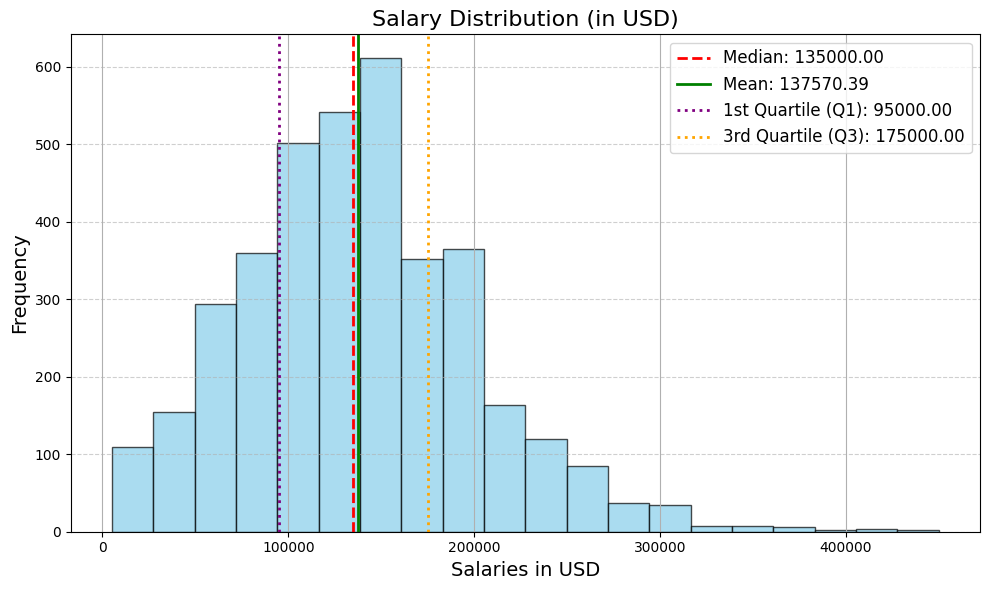

In [64]:
# Salaries Distribution per year for data science job related
# Calculate key statistics
median_salary = ds_salaries['salary_in_usd'].median()
mean_salary = ds_salaries['salary_in_usd'].mean()
q1_salary = np.percentile(ds_salaries['salary_in_usd'], 25)  # 1st Quartile
q3_salary = np.percentile(ds_salaries['salary_in_usd'], 75)  # 3rd Quartile

# Plot histogram
plt.figure(figsize=(10, 6))  # Increase plot size for better visibility
ds_salaries['salary_in_usd'].hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical lines for statistics
plt.axvline(median_salary, color='red', linestyle='--', linewidth=2, label=f'Median: {median_salary:.2f}')
plt.axvline(mean_salary, color='green', linestyle='-', linewidth=2, label=f'Mean: {mean_salary:.2f}')
plt.axvline(q1_salary, color='purple', linestyle=':', linewidth=2, label=f'1st Quartile (Q1): {q1_salary:.2f}')
plt.axvline(q3_salary, color='orange', linestyle=':', linewidth=2, label=f'3rd Quartile (Q3): {q3_salary:.2f}')

# Add labels and title
plt.title('Salary Distribution (in USD)', fontsize=16)
plt.xlabel('Salaries in USD', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add legend
plt.legend(fontsize=12)

# Show grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()  # Adjust spacing
plt.show()

- The distribution is right-skewed, with most salaries concentrated below USD 200K.
- Median Salary: USD 135,000.
- Compared to SG’s median monthly income (~SGD 5,197, 2023), data roles earn ~3× more than national median.
- Majority (50%) of salaries fall between USD 95,000 and 175,000.
- A small number of high-paying roles drive the average up.


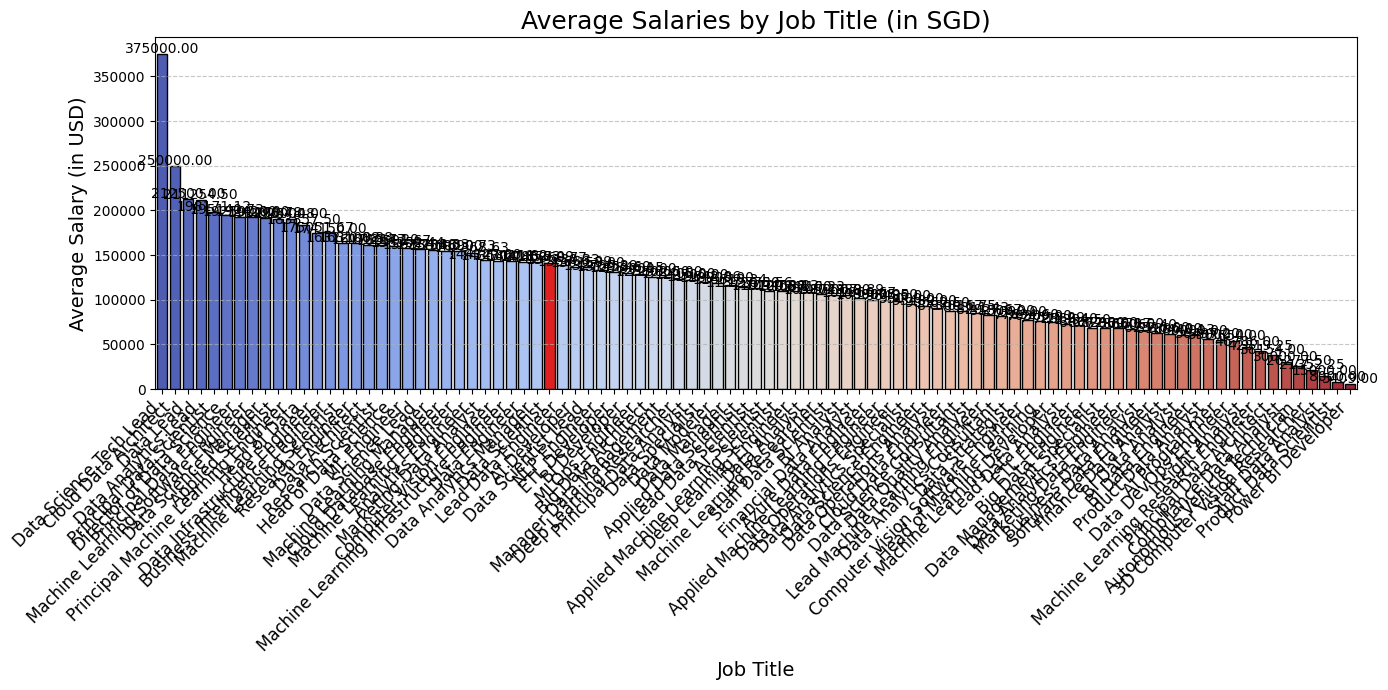

In [65]:
# Group by job title and calculate average salaries in SGD
avg_salaries = ds_salaries.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Set up figure
plt.figure(figsize=(14, 7))

# Optional Enhancement 1: Color by Salary Intensity (using Seaborn palette)
colors = sns.color_palette('coolwarm', n_colors=len(avg_salaries))

# Optional Enhancement 2: Highlight Specific Job Titles (e.g., 'Data Scientist' in red)
highlighted_colors = [
    'red' if job == 'Data Scientist' else colors[i]
    for i, job in enumerate(avg_salaries.index)
]

# Plot the bar graph using Seaborn
sns.barplot(
    x=avg_salaries.index,
    y=avg_salaries.values,
    hue=avg_salaries.index,  # Assign job titles to the hue parameter
    dodge=False,             # Disable dodging behavior
    palette=highlighted_colors,
    edgecolor='black',
    legend=False             # Suppress legend
)

# Add titles and labels
plt.title('Average Salaries by Job Title (in SGD)', fontsize=18)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Average Salary (in USD)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional Enhancement 3: Annotate bars with salary values
for i, value in enumerate(avg_salaries.values):
    plt.text(i, value + 1000, f'{value:.2f}', ha='center', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [66]:
ds_salaries['job_title'].unique()

# We realised that there are too many different job titles...

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

We realised there are too many different job titles, so will group them into smaller groups to ease analysis.

- Data Analyst : Includes all roles related to data analysis, BI analysis, and insights.
- Data Scientist: Covers all data science roles, including lead, senior, and applied data scientists.
- Machine Learning Engineer : Covers all machine learning and AI-related engineering roles.
- Data Engineer: Includes backend data infrastructure roles like data engineering, big data, and cloud engineering.
- Data Manager/Architect: Encompasses leadership and strategy roles, such as heads of data, data managers, and architects.
- Specialized Roles: Covers unique, domain-specific roles such as NLP Engineers, Autonomous Vehicle Technicians, and Computer Vision Engineers.

In [67]:
# Classification mapping
# This is the improved classification mapping that contains 93 unique job roles

classification_mapping = {
    'Data Analyst': [
        'Data Analyst', 'Staff Data Analyst', 'Financial Data Analyst',
        'Marketing Data Analyst', 'Insights Analyst', 'Compliance Data Analyst',
        'Data Quality Analyst', 'Business Data Analyst', 'Data Analytics Consultant',
        'Data Analytics Specialist', 'Product Data Analyst', 'Principle Data Analyst',
        'Data Operations Analyst', 'Finance Data Analyst', 'Principal Data Analyst'
    ],
    'Data Scientist': [
        'Data Scientist', 'Principal Data Scientist', 'Lead Data Scientist',
        'Applied Data Scientist', 'Deep Learning Researcher', 'AI Scientist',
        'Machine Learning Scientist', 'Data Science Consultant', 'Data Science Lead',
        'Applied Scientist', 'Research Scientist', 'Applied Machine Learning Scientist',
        'Machine Learning Researcher', 'Product Data Scientist', 'Data Science Engineer',
        'Staff Data Scientist'
    ],
    'Machine Learning Engineer': [
        'ML Engineer', 'Machine Learning Engineer', 'Applied Machine Learning Engineer',
        'AI Developer', 'Deep Learning Engineer', 'NLP Engineer',
        'Machine Learning Research Engineer', 'Machine Learning Developer',
        'Machine Learning Software Engineer', 'Lead Machine Learning Engineer',
        'Head of Machine Learning', 'Machine Learning Manager',
        'Machine Learning Infrastructure Engineer', 'Principal Machine Learning Engineer'
        'MLOps Engineer', 'Machine Learning Specialist', 'Machine Learning Consultant',
        'Principal Machine Learning Engineer'
    ],
    'Data Engineer': [
        'Data Engineer', 'Big Data Engineer', 'Data DevOps Engineer', 'ETL Engineer',
        'Cloud Data Engineer', 'Data Infrastructure Engineer', 'Software Data Engineer',
        'Marketing Data Engineer', 'Azure Data Engineer', 'ETL Developer',
        'Data Operations Engineer', 'Lead Data Engineer', 'Data Specialist',
        'Principle Data Engineer', 'Principal Data Engineer'
    ],
    'Data Manager/Architect': [
        'Data Architect', 'Principal Data Architect', 'Big Data Architect',
        'Cloud Database Engineer', 'Data Manager', 'Manager Data Management',
        'Data Strategist', 'Data Analytics Lead', 'Data Management Specialist',
        'Cloud Data Architect'
    ],
    'Business Intelligence/Analytics': [
        'BI Analyst', 'BI Developer', 'BI Data Engineer', 'Analytics Engineer',
        'Business Intelligence Engineer', 'Data Analytics Manager',
        'Power BI Developer', 'Data Analytics Engineer', 'Analytics Consultant', 'BI Data Analyst'
    ],
    'Specialized Roles': [
        'Autonomous Vehicle Technician', '3D Computer Vision Researcher',
        'Computer Vision Software Engineer', 'Computer Vision Engineer',
        'AI Programmer', 'AI Scientist', 'Data Modeler', 'MLOps Engineer'
    ],
    'Data Senior Leader/Manager': [
        'Director of Data Science', 'Head of Data', 'Head of Data Science',
        'Head of Machine Learning', 'Lead Data Engineer', 'Lead Data Scientist',
        'Lead Machine Learning Engineer', 'Data Science Tech Lead', 'Data Lead', 'Lead Data Analyst'
        'Data Sciencer Manager', 'Data Scienctist Lead', 'Data Science Manager',
        'Lead Data Analyst', 'Data Scientist Lead'
    ],
    'Other Roles': [
        'Research Engineer', 'Insight Analyst', 'AI Programmer'
    ]
}



In [68]:
# Reverse mapping for efficient assignment
reverse_mapping = {}
for group, titles in classification_mapping.items():
    for title in titles:
        reverse_mapping[title] = group

# Assign group to each job title
ds_salaries['job_group'] = ds_salaries['job_title'].map(reverse_mapping)

# For any job titles not mapped, assign as 'Other'
ds_salaries['job_group'] = ds_salaries['job_group'].fillna('Other')

# Preview the result
print(ds_salaries[['job_title', 'job_group']].head())

                  job_title                  job_group
0  Principal Data Scientist             Data Scientist
1               ML Engineer  Machine Learning Engineer
2               ML Engineer  Machine Learning Engineer
3            Data Scientist             Data Scientist
4            Data Scientist             Data Scientist


In [69]:
ds_salaries['job_title'][ds_salaries['job_group']=='Other'].unique()
# This is to check that all unique job_titles have been classified into each group out of 10 job_group

array([], dtype=object)

C:\Users\yxisme\AppData\Local\Temp\ipykernel_13228\3562912144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\yxisme\AppData\Local\Temp\ipykernel_13228\3562912144.py:11: UserWarning: The palette list has more values (93) than needed (9), which may not be intended.
  sns.barplot(


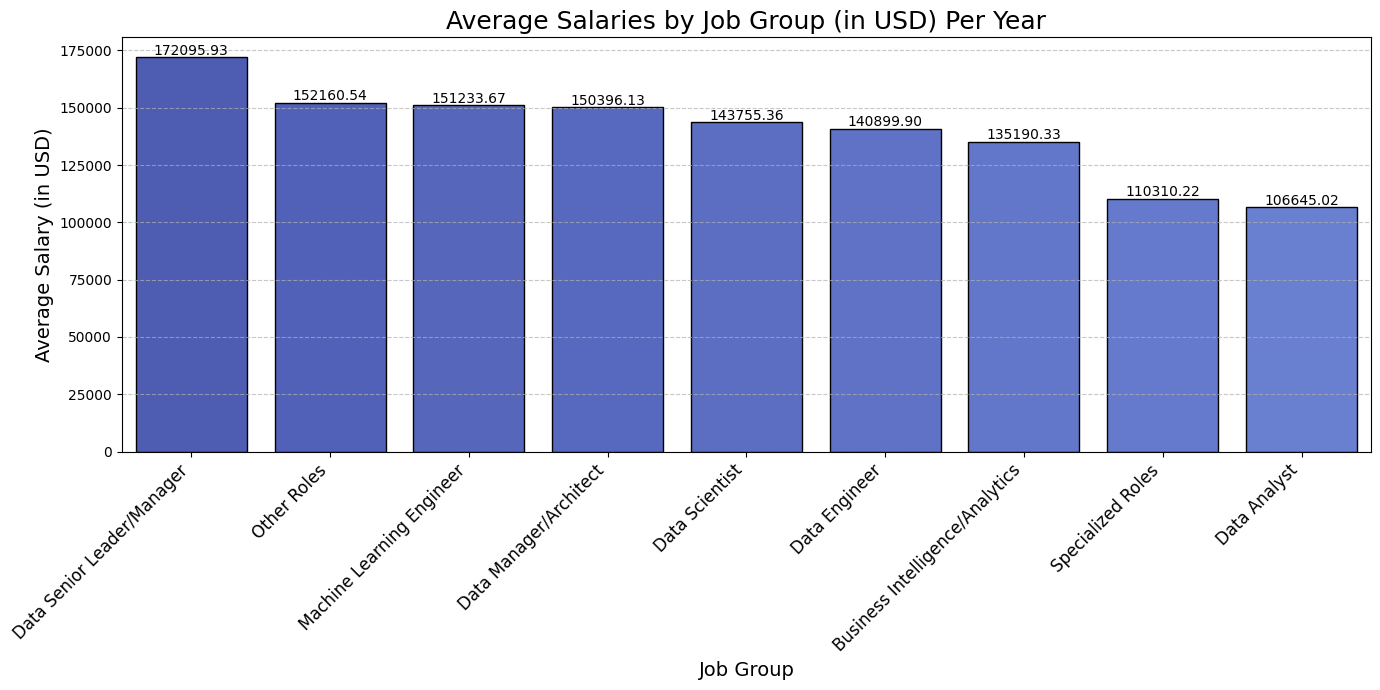

In [70]:
# Group by job_group and calculate average salaries
avg_salaries_by_group = ds_salaries.groupby('job_group')['salary_in_usd'].mean().sort_values(ascending=False)

# Set up figure size
plt.figure(figsize=(14, 7))

# Optional Enhancement 1: Color by Salary Intensity (using Seaborn palette)
colors = sns.color_palette('coolwarm', n_colors=len(avg_salaries_by_group))

# Plot bar graph
sns.barplot(
    x=avg_salaries_by_group.index,
    y=avg_salaries_by_group.values,
    palette=highlighted_colors,
    edgecolor='black'
    )

# Add titles and labels
plt.title('Average Salaries by Job Group (in USD) Per Year', fontsize=18)
plt.xlabel('Job Group', fontsize=14)
plt.ylabel('Average Salary (in USD)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional Enhancement 3: Annotate bars with salary values
for i, value in enumerate(avg_salaries_by_group.values):
    plt.text(i, value + 1000, f'{value:.2f}', ha='center', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

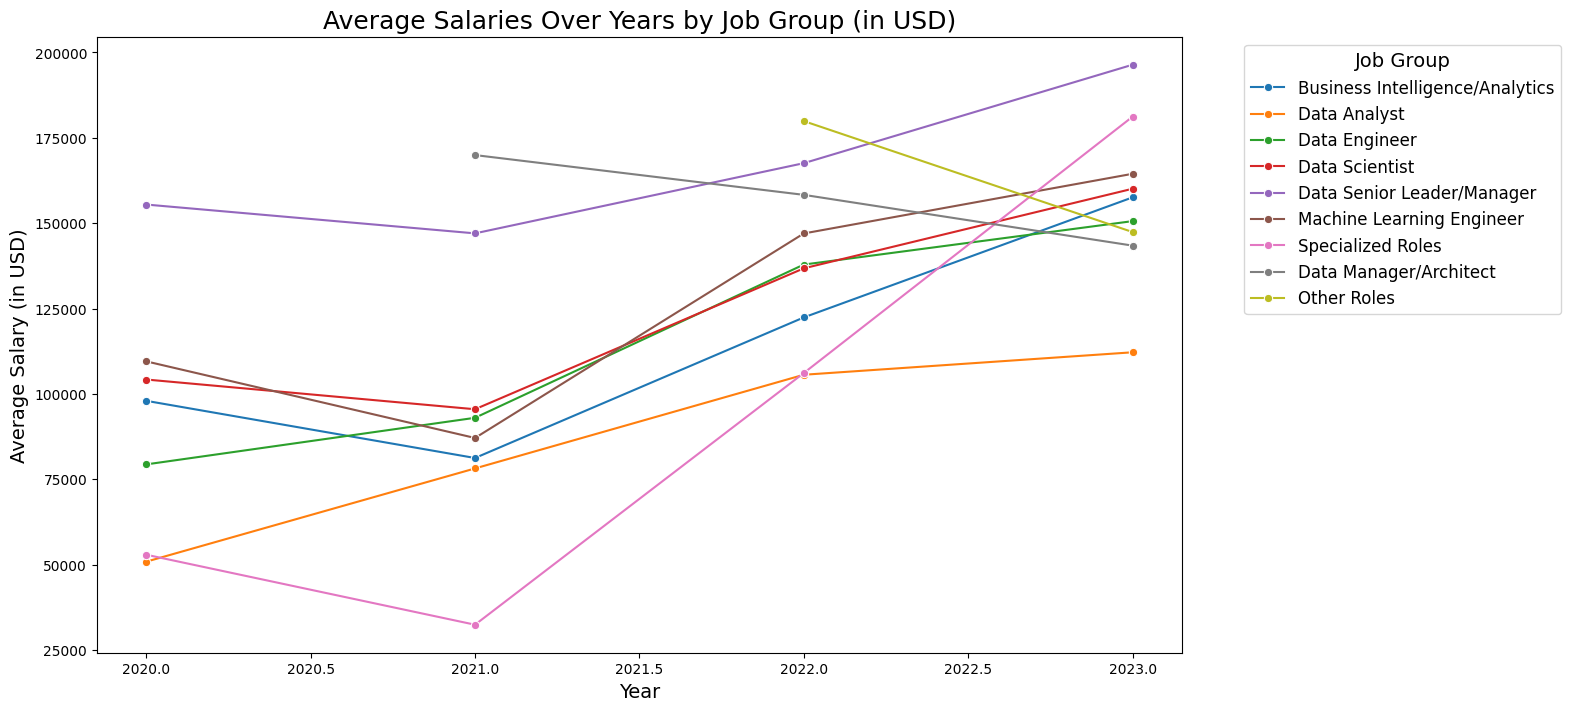

In [71]:
# Replace infinite values in the dataset
ds_salaries.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Group data by work_year and job_group, and calculate the mean salary
avg_salaries_by_year = (
    ds_salaries.groupby(['work_year', 'job_group'])['salary_in_usd']
    .mean()
    .reset_index()
)

# Set up the figure size
plt.figure(figsize=(14, 8))

# Plot the time-series with Seaborn
sns.lineplot(
    data=avg_salaries_by_year,
    x='work_year',  # X-axis: Years
    y='salary_in_usd',  # Y-axis: Average salaries
    hue='job_group',  # Different lines for each job group
    marker='o',  # Add markers at data points
    palette='tab10'  # Use a color palette for differentiation
)

# Add titles and labels
plt.title('Average Salaries Over Years by Job Group (in USD)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Salary (in USD)', fontsize=14)

# Customize legend
plt.legend(
    title='Job Group',
    fontsize=12,
    title_fontsize=14,
    bbox_to_anchor=(1.05, 1),  # Place legend outside the plot
    loc='upper left'
)




Salary Growth Trends Upward trends in most job groups: Several job groups (e.g., Machine Learning Engineer, Data Scientist, Data Engineer) show consistent or sharp salary growth after 2021. This reflects increasing demand for these roles, likely driven by advancements in AI, data science, and the digital transformation of industries. Specialized Roles experienced a sharp rise in 2023: Roles like NLP Engineer, Autonomous Vehicle Technician, and Computer Vision Engineer seem to have grown dramatically in salary. This indicates growing investment in cutting-edge technologies.

Salary Stability or Decline Data Manager/Architect group shows high salaries but less growth: While this group started with the highest average salaries in 2020, its growth flattened compared to other groups. This could suggest that these leadership and strategy roles are maturing or that salary increases are slower due to their established nature.

Relative Position of Job Groups Highest salaries: Data Manager/Architect initially led, but Specialized Roles surpassed it in 2023. Lowest salaries: Data Analyst consistently has the lowest salaries across all years. This reflects the entry-level nature of these roles compared to other job groups requiring specialized skills.

Why Is This Important?
Career Insights For Job Seekers: Professionals can use this information to identify lucrative job roles and track which skills or fields are in high demand. Example: A person interested in transitioning to Machine Learning Engineer or Specialized Roles may want to acquire relevant technical skills. For Employers: Employers can benchmark their salary offerings to stay competitive and attract top talent. Example: If an employer offers lower salaries for Specialized Roles, they may struggle to hire experts in cutting-edge fields like NLP or autonomous systems.
Strategic Workforce Planning Companies can forecast workforce needs and budget allocations based on salary trends. Example: Increasing salaries for Data Scientist and Machine Learning Engineer roles suggest these positions are critical to modern businesses, requiring higher investments.
Identifying Opportunities The dramatic growth in Specialized Roles indicates emerging fields that might require further attention, investment, and workforce training.

Industry Analysis This chart helps businesses and policymakers understand how the data/tech landscape is shifting. Example: The steady rise in salaries for all roles reflects the growing reliance on data-driven decision-making and AI-driven technologies across industries.

In [72]:
ds_salaries['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

- SE (Senior-Level / Senior Employee): This represents individuals with significant experience in their field who typically hold senior or leadership positions. They often lead projects, mentor junior employees, and make strategic decisions.
- MI (Mid-Level): This represents employees with a moderate amount of experience. They have moved beyond entry-level positions but are not yet in senior or expert-level roles. They are often responsible for more complex tasks and may work independently.
- EN (Entry-Level): This represents employees at the start of their careers, such as recent graduates or individuals with little professional experience. They are usually in junior positions and may require significant training and supervision.
- EX (Executive-Level / Expert-Level): This represents highly experienced individuals, often in top management or highly specialized roles. They usually have extensive knowledge and expertise in their field, holding positions like Directors, VPs, or other executive roles.

In [73]:
ds_salaries['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

- FT (Full-Time): The employee works full-time hours and is typically hired as a permanent or long-term worker.
- CT (Contract): The employee is hired on a contract basis for a specific project or time period, with no expectation of long-term employment.
- FL (Freelance): The worker is hired on a freelance basis, often as a self-employed individual providing services on a temporary or project-specific basis. Freelancers typically work for multiple clients.
- PT (Part-Time): The employee works fewer hours than a full-time employee, typically on a regular or semi-regular schedule.

## Machine Learning

### Clustering

Objective 1: Group jobs based on characteristic
Use remote ratio, company size, and experience level to cluster jobs into categories such as "fully remote senior roles at large companies" or "entry-level hybrid roles at small companies." This helps identify patterns in job structure and career progression."

Objective 2: Analyse trends across clusters
After clustering, analyze the mean or median salary within each group to uncover salary distribution trends. This allows insights into how salary varies across different job types, experience levels, and work environments without influencing the clustering process.

Transforming features ensures that all variables contribute equally during clustering, especially when they are on vastly different scales (remote_ratio). Clustering algorithms like K-Means rely on distance calculations (e.g., Euclidean), which can be dominated by larger-scaled features, leading to biased or poorly defined clusters. Normalization or standardization scales features to comparable ranges, improving accuracy, interpretability, and fairness in cluster formation.

In [74]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select Features for Clustering
features = ['remote_ratio', 'company_size_rank', 'experience_level_rank']

# Step 2: Map Categorical Variables to Numeric Values
size_mapping = {'S': 1, 'M': 2, 'L': 3}
experience_mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}

ds_salaries['company_size_rank'] = ds_salaries['company_size'].map(size_mapping).fillna(2)  # Default to 'M' if missing
ds_salaries['experience_level_rank'] = ds_salaries['experience_level'].map(experience_mapping).fillna(2)  # Default to 'MI'

# Step 3: Normalize Numerical Features using MinMaxScaler
scaler = MinMaxScaler()
ds_salaries[features] = scaler.fit_transform(ds_salaries[features])

# Step 4: Apply K-Means Clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=99, n_init=10)
ds_salaries['cluster'] = kmeans.fit_predict(ds_salaries[features])

# Step 5: Analyze Cluster Characteristics
cluster_summary = ds_salaries.groupby('cluster').agg({
    'remote_ratio': 'mean',             # Average remote ratio (not scaled)
    'company_size_rank': 'mean',        # Average company size rank
    'experience_level_rank': 'mean',    # Average experience level rank
    'salary_in_usd': 'median'           # Median salary in original scale
}).reset_index()

# Rename columns for clarity
cluster_summary.rename(columns={
    'remote_ratio': 'avg_remote_ratio',
    'company_size_rank': 'avg_company_size',
    'experience_level_rank': 'avg_experience_level',
    'salary_in_usd': 'median_salary_usd'
}, inplace=True)

# Display cluster summary
print("Cluster Summary with K=4:")
print(cluster_summary)


Cluster Summary with K=4:
   cluster  avg_remote_ratio  avg_company_size  avg_experience_level  \
0        0          0.003158          0.529825              0.680000   
1        1          0.996511          0.464759              0.573157   
2        2          0.052910          0.492945              0.247501   
3        3          0.833333          1.000000              0.390909   

   median_salary_usd  
0           146000.0  
1           138000.0  
2           103200.0  
3            95749.5  


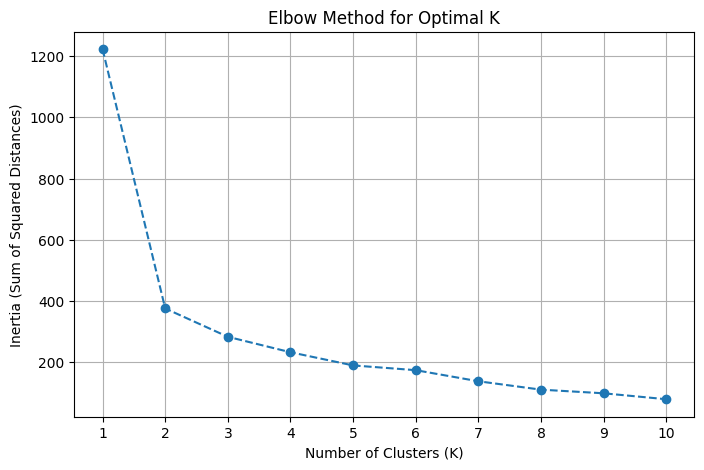

In [75]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of possible cluster numbers
k_values = range(1, 11)
inertia_values = []

# Run K-Means for each K and store inertia values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=99)
    kmeans.fit(ds_salaries[features])
    inertia_values.append(kmeans.inertia_)  # Inertia is the sum of squared distances to centroids

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K")
plt.xticks(k_values)
plt.grid()
plt.show()


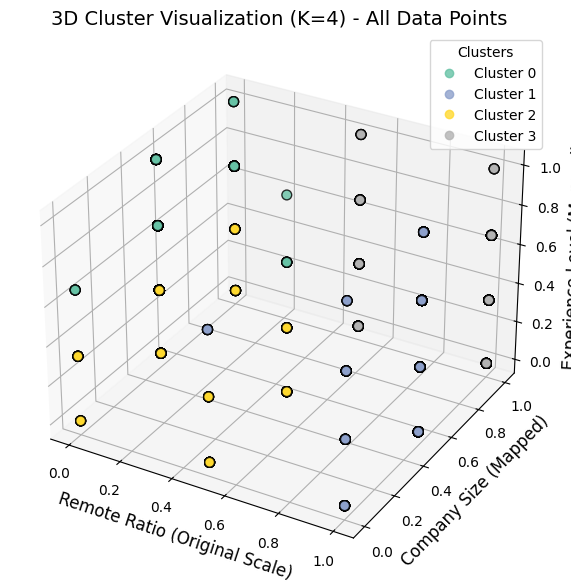

In [76]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extract clustering features
x = ds_salaries['remote_ratio']
y = ds_salaries['company_size_rank']
z = ds_salaries['experience_level_rank']
clusters = ds_salaries['cluster']

# Define color map
colors = sns.color_palette('Set2', n_colors=len(clusters.unique()))

# Scatter plot of all data points
scatter = ax.scatter(x, y, z, c=clusters, cmap='Set2', s=50, alpha=0.8, edgecolors='k')

# Set labels
ax.set_xlabel("Remote Ratio (Original Scale)", fontsize=12)
ax.set_ylabel("Company Size (Mapped)", fontsize=12)
ax.set_zlabel("Experience Level (Mapped)", fontsize=12)
ax.set_title("3D Cluster Visualization (K=4) - All Data Points", fontsize=14)

# Create legend
legend_labels = [f"Cluster {i}" for i in range(len(clusters.unique()))]
legend = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters", loc="upper right")

# Show plot
plt.show()


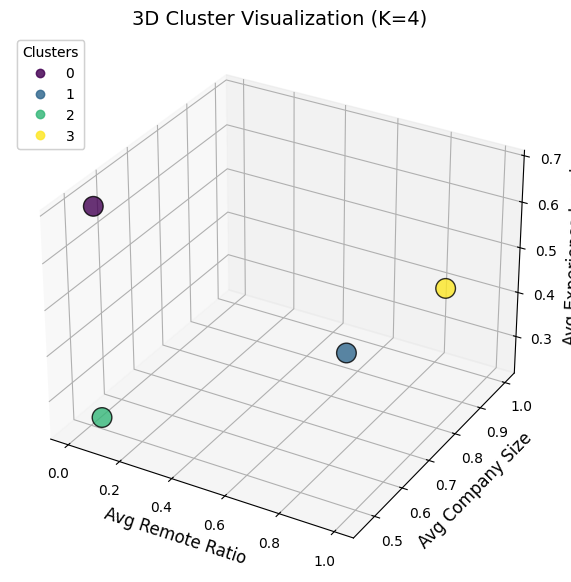

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Extract cluster summary values
x = cluster_summary['avg_remote_ratio']
y = cluster_summary['avg_company_size']
z = cluster_summary['avg_experience_level']
clusters = cluster_summary['cluster']  # Cluster labels (0,1,2,3,4,5)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
scatter = ax.scatter(x, y, z, c=clusters, cmap="viridis", s=200, alpha=0.8, edgecolors="k")

# Labels
ax.set_xlabel("Avg Remote Ratio", fontsize=12)
ax.set_ylabel("Avg Company Size", fontsize=12)
ax.set_zlabel("Avg Experience Level", fontsize=12)
ax.set_title("3D Cluster Visualization (K=4)", fontsize=14)

# Create legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters", loc="upper left")
ax.add_artist(legend1)

# Show plot
plt.show()


Cluster Analysis of Data Science Job Salaries (K=4)
Objective 1: Group Jobs Based on Characteristics
The clustering process has revealed four distinct job groups based on their work setup and company structure.

🔹 Cluster 0 (Purple - Low Remote, Medium Company, High Experience Level) →  Median Salary of 146,000

Primarily on-site roles with very low remote flexibility.
Medium-sized companies, with the highest experience level among all clusters.

Common roles:
- Data Science Managers
- Principal Data Scientists
- Senior Data Engineers

Insight: The high salary aligns with expectations, as these firms must offer competitive pay to attract highly skilled professionals for on-site roles.

🔹 Cluster 1 (Blue - High Remote, Medium Company, Mid-Level Experience) → 138,000 Median Salary of 138,000

Highly remote-friendly roles with flexible work arrangements.
Medium-sized companies with mid-tier experience levels.

Common roles:
- Remote Machine Learning Engineers
- Senior Data Scientists

Insight:
This cluster confirms that remote flexibility does not significantly reduce salary potential—mid-sized firms are willing to pay competitively for remote expertise.

🔹 Cluster 2 (Green - Low Remote, Small Company, Low Experience Level) → Median Salary of 103,200

Mostly on-site jobs in smaller firms.
Entry-level or junior positions with the lowest experience levels.

Common roles:
- Data Analysts
- Junior Engineers
Unexpected Finding:

This cluster earns more than Cluster 3, despite having lower experience and being in smaller firms.

Possible Explanation:

Small firms might offer higher salaries to attract talent willing to work on-site.
Some startups compensate for instability with higher pay.

🔹 Cluster 3 (Yellow - High Remote, Large Company, Mid-Level Experience) → $95,750 Median Salary

Remote jobs within large corporations.
Mid-level professionals in well-established firms.

Common roles:
- Remote Data Scientists
- Data Engineers

Unexpected Finding:
Lowest median salary among all clusters despite mid-level experience.

Possible Explanation:
Large companies use structured salary bands and global hiring to reduce remote salaries.
Employees trade salary for job stability, benefits, and work-life balance.

Objective 2: In-Depth Salary Trend Analysis Across Clusters

1️⃣ Remote Work Flexibility Does Not Always Guarantee Higher Pay
Cluster 1 and Cluster 3 both have high remote work ratios, yet salaries in Cluster 3 are significantly lower. This suggests that while remote work is desirable, large firms may take advantage of it by reducing compensation for remote employees, especially in cost-effective locations. Professionals looking for remote roles should consider not just salary but also long-term career growth, job security, and company policies.

2️⃣ Small Companies with Low Experience Levels Have Higher Salaries Than Large Companies with Mid-Level Experience
Cluster 2, which consists of small companies with low experience requirements, surprisingly offers higher median salaries than Cluster 3, where jobs are at large companies with mid-level experience. This anomaly can be explained by several factors. Smaller firms, especially startups, often compensate for risk and instability with higher salaries. They may also have fewer structured salary bands, allowing for more flexibility in pay. On the other hand, large companies may prioritize stability, career progression, and benefits over direct salary compensation, leading to lower median pay for mid-level employees.

3️⃣ Medium-Sized Companies Offer the Most Competitive Pay
Both on-site and remote roles in medium-sized companies (Clusters 0 and 1) offer the highest salaries. This suggests that medium firms provide the best balance between competitive salaries and flexible work arrangements. They may be less constrained by strict corporate salary structures while still offering enough stability to attract skilled professionals.

Final Key Insights from Clustering Analysis:

- Remote flexibility does not always lead to higher pay, especially in large firms.
- Small companies may offer higher salaries to attract talent willing to work on-site.
- Medium-sized companies provide the best balance of salary and work flexibility.
- Job seekers should consider factors beyond salary, such as career growth, job stability, and work-life balance.

#### Evaluation

In [78]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(ds_salaries[features], kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.8058068063473908


In [79]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(ds_salaries[features], kmeans.labels_)
print(f"Davies-Bouldin Score: {db_score}")

Davies-Bouldin Score: 0.6819396636458618


A very high Silhouette Score (~0.9-1.0) can indicate too many clusters, where some clusters might contain only a few points.
A low score (~0.2-0.3) suggests clusters are overlapping and not well-separated.
- Our score is 0.806, meaning clusters are well defined & separated.

A higher Davies Bouldin score (~1 or more) suggests overlapping clusters.
A lower score (~0.3-0.7) is ideal, indicating distinct clusters.
- Our score is 0.68 which falls within the lower score range, indicating distinct clusters.

### Time Series Regression Prediction

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import xgboost as xgb

In [81]:
ds_salaries["work_year"].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

Want to split the data chronologically i.e. 2020-2022 training data, 2023 test data. However, there would be too much test data (~50%). So we can either: downsample 2023 data OR give heavier weights on older data. We'll try giving weights first.

In [82]:
# create data frame for xgb and drop irrelevant columns for prediction
ds_salaries_xgb = ds_salaries.drop(columns = ["job_title", "salary_currency", "salary", "employee_residence",
                                              "company_location"]) # need to break down location

# assign heavier weightage for older data
ds_salaries_xgb["weight"] = ds_salaries_xgb["work_year"].map({2020: 1.5, 2021: 1.3, 2022: 1.1, 2023: 1.0})

# transform categoricals into dummies
ds_salaries_xgb = pd.get_dummies(ds_salaries_xgb,
                                 columns = ["experience_level", "employment_type", "company_size", "job_group"])

# split to training and testing data
train = ds_salaries_xgb[ds_salaries_xgb["work_year"] < 2023]
test = ds_salaries_xgb[ds_salaries_xgb["work_year"] == 2023]
X_train, y_train = train.drop(columns = ["salary_in_usd"]), train["salary_in_usd"]
X_test, y_test = test.drop(columns = ["salary_in_usd"]), test["salary_in_usd"]
weights_train = X_train["weight"]
X_train = X_train.drop(columns = ['weight'])
X_test = X_test.drop(columns = ['weight'], errors='ignore')

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

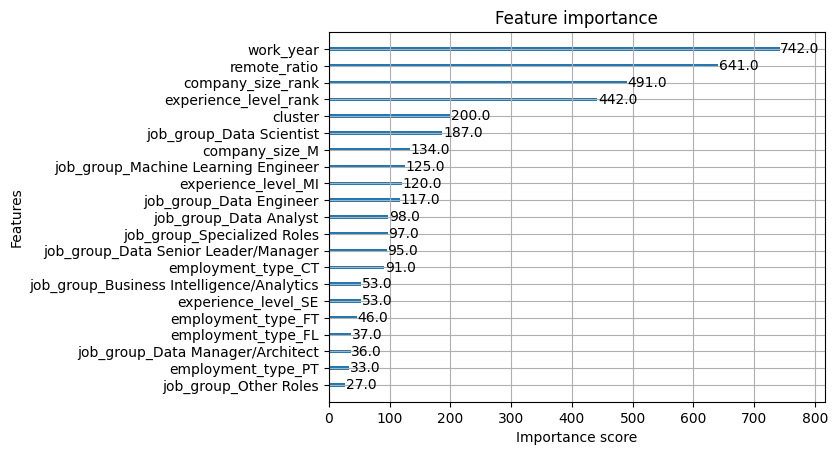

In [83]:
# fit to model and plot feature importance
model = xgb.XGBRegressor(n_estimators = 100)
model.fit(X_train, y_train, verbose = False, sample_weight = weights_train)
xgb.plot_importance(model)

In [84]:
# predict on test set and evaluate metrics
pred = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, pred)
rmse = metrics.root_mean_squared_error(y_test, pred)

print(f"MAE: {mae}\nRMSE: {rmse}")

MAE: 43669.12890625
RMSE: 58345.203125


For this model, work year seems to be the most important, followed by the remote ratio, company size, experience level, job titles, and employment type not contributing much. This model likely over-relies on work year, learning that salaries increase over time and not capturing effects of other factors. Could be due to overfitting to the time trend. Furthermore, the problem with trying to do a time series prediction is that the lack of granularity/not enough time points. Time series models work better with finer time intervals (or more intervals), but for this dataset we only have 4 points (2020-2023). Could be another reason it's overfitting to work year. Model works but probably not great. We'll try carry out hyperparameter tuning first and see if that improves the result at all.

In [85]:
# hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(xgb.XGBRegressor(), param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

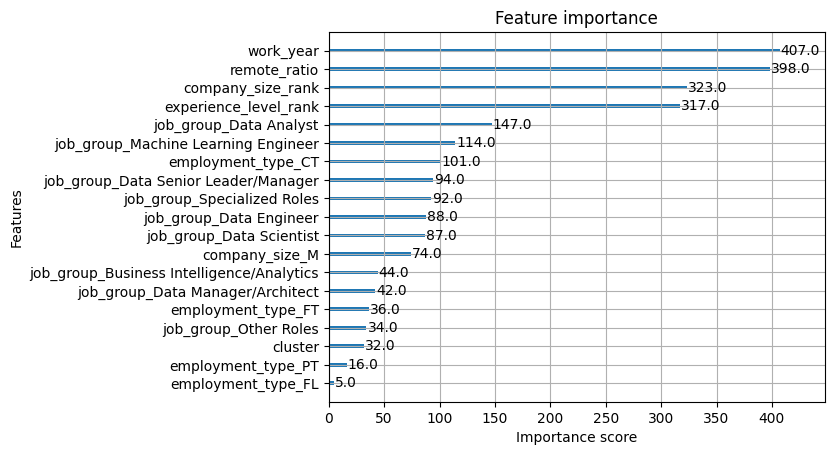

In [86]:
# fit to model and plot feature importance
model2 = xgb.XGBRegressor(**best_params, n_estimators = 100)
model2.fit(X_train, y_train, verbose = False, sample_weight = weights_train)
xgb.plot_importance(model2)

In [87]:
# predict on test set and evaluate metrics
pred2 = model2.predict(X_test)
mae2 = metrics.mean_absolute_error(y_test, pred2)
rmse2 = metrics.root_mean_squared_error(y_test, pred2)

print(f"MAE: {mae2}\nRMSE: {rmse2}")

MAE: 43728.33984375
RMSE: 58236.62890625


There is lesser weight to work year now, but it's still alot, and the errors of this model are still high. We can try a reguluar linear regression to predict, as well as to classify people into groups of salary rather than do a time series prediction given our dataset. E.g. Classify X into low, medium, high salary depending on X's features, which we will explore.

### Linear Regression

### Naives Bayes Classification

In [88]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [89]:
# drop unnecessary columns
ds_salaries_nb = ds_salaries.drop(columns = ["job_title", "salary_currency", "salary", "employee_residence",
                                              "company_size", "work_year"])

# find salary quartiles
# our salary distribution is skewed so binning based on salary spread is more meaningful (keep it to
# these no. of bins. increasing the no. of bins decreases acc)
Q1 = ds_salaries_nb["salary_in_usd"].quantile(0.25)
Q3 = ds_salaries_nb["salary_in_usd"].quantile(0.75)

# categorise salaries based on quartiles
def categorize_salary(salary):
    if salary < Q1:
        return "low"
    elif salary <= Q3:
        return "medium"
    else:
        return "high"
ds_salaries_nb["salary_range"] = ds_salaries_nb["salary_in_usd"].apply(categorize_salary)

# transform remote ratio to categorical
ds_salaries_nb["remote_ratio_cat"] = pd.cut(
    ds_salaries_nb["remote_ratio"], bins=[-1, 0, 50, 100], labels=["Onsite", "Hybrid", "Remote"])

# encode categoricals (one hot encoding lowered acc bc too many categories -> too sparse)
categoricals = ["experience_level", "employment_type", "job_group", "remote_ratio_cat", "company_location"]
for col in categoricals:
    le = LabelEncoder()
    ds_salaries_nb[col] = le.fit_transform(ds_salaries_nb[col])

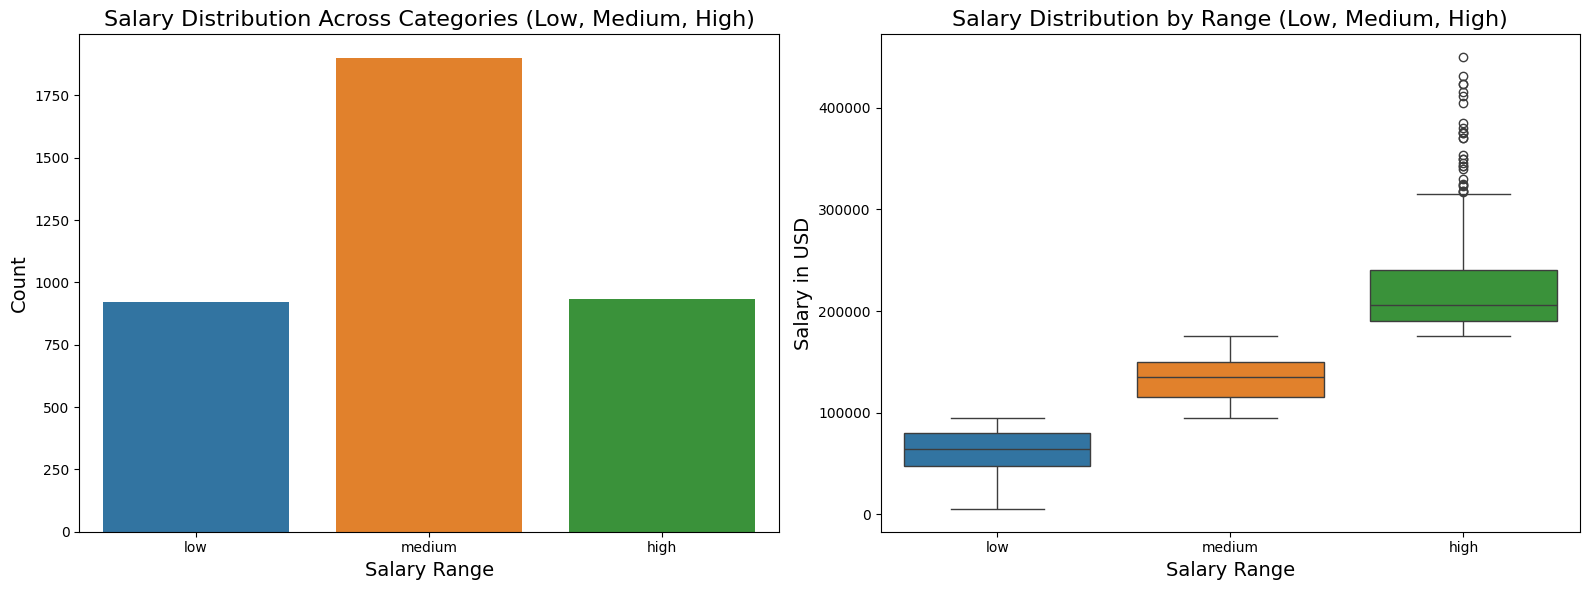

In [90]:
# showing how the data is binned into low, med, high based on quartiles
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# left
sns.countplot(data=ds_salaries_nb, x='salary_range', ax=axes[0], hue = "salary_range")
axes[0].set_title('Salary Distribution Across Categories (Low, Medium, High)', fontsize=16)
axes[0].set_xlabel('Salary Range', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)

# right
sns.boxplot(data=ds_salaries_nb, x='salary_range', y='salary_in_usd', ax=axes[1], hue = "salary_range")
axes[1].set_title('Salary Distribution by Range (Low, Medium, High)', fontsize=16)
axes[1].set_xlabel('Salary Range', fontsize=14)
axes[1].set_ylabel('Salary in USD', fontsize=14)

plt.tight_layout()
plt.show()

Above graph displays how the salaries were binned and labelled, as well as the distribution of salaries within each label.

In [91]:
# prepare feature (X) and target variable (y)
X = ds_salaries_nb[categoricals]
y = ds_salaries_nb["salary_range"]

# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# initialise and train model
nbmodel = CategoricalNB()
nbmodel.fit(X_train, y_train)

# predict and evaluate
y_pred = nbmodel.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6549520766773163
              precision    recall  f1-score   support

        high       0.61      0.20      0.30       218
         low       0.80      0.59      0.68       232
      medium       0.62      0.89      0.73       489

    accuracy                           0.65       939
   macro avg       0.68      0.56      0.57       939
weighted avg       0.66      0.65      0.62       939



In [92]:
# hyperparameter tuning
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Smoothing parameter
    'fit_prior': [True, False],  # Whether to use class priors
    'min_categories': [2, 3, 4]  # Control minimal number of categories per feature
}

model = CategoricalNB()

# gridsearchcv
grid_search = GridSearchCV(model, param_grid, cv=4, scoring='accuracy', verbose=False)
grid_search.fit(X_train_scaled, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

Best Parameters: {'alpha': 0.1, 'fit_prior': True, 'min_categories': 2}
Best Accuracy: 0.5607244318181818


In [93]:
# 5 fold cv
cv_scores = cross_val_score(model, X, y, cv=5)  # cv=5 means 5-fold cross-validation

# Output the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")
print(f"Standard deviation of accuracy: {cv_scores.std()}")

Cross-validation scores: [0.62183755        nan 0.6551265  0.6391478  0.64580559]
Mean accuracy: nan
Standard deviation of accuracy: nan


c:\Users\yxisme\Desktop\data stuff\spaceship-titanic\venv\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\yxisme\Desktop\data stuff\spaceship-titanic\venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 144, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yxisme\Desktop\data stuff\spaceship-titanic\venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yxisme\Desktop\data stuff\spaceship-titanic\venv\Lib\site-packages\sklearn\base.py", line 572, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^

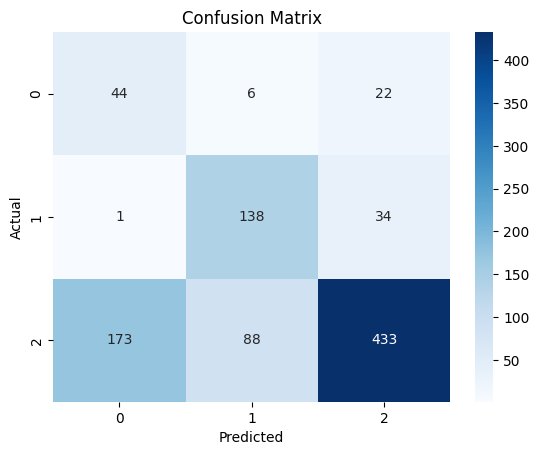

In [94]:
# other evaluation for the model
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# where 0 is high, 1 is low, 2 is medium

We notice that it classifies medium salaries well, low salaries fairly well, high decently. But many “Medium” salaries misclassified as “High”. Could be due to limitations of classifying salaries where salary thresholds are ambiguous.

### Decision Tree Classification

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [96]:
# Load the dataset
df = ds_salaries

In [97]:
# Create 3 bins with 25% of values in Low, 50% in Medium, and 25% in High
df['salary_bin'] = pd.qcut(
    df['salary_in_usd'],
    q=[0, 0.25, 0.75, 1.0],  # custom quantiles at 25% and 75%
    labels=['Low', 'Medium', 'High']
)

# Check the distribution
print(df['salary_bin'].value_counts())


salary_bin
Medium    1867
Low        956
High       932
Name: count, dtype: int64


In [98]:
# Select features and target
features = ['experience_level', 'employment_type', 'job_group',
            'remote_ratio', 'company_size', 'company_location']
target = 'salary_bin'

# Create a new DataFrame with these features
X = df[features]
y = df[target]

# Use one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)


In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [100]:
# Initialize the classifier (you can tune parameters like max_depth, min_samples_split, etc.)
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [101]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report for more details
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optionally, show the confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6364846870838882

Classification Report:
               precision    recall  f1-score   support

        High       0.51      0.21      0.30       186
         Low       0.87      0.57      0.69       191
      Medium       0.60      0.88      0.72       374

    accuracy                           0.64       751
   macro avg       0.66      0.55      0.57       751
weighted avg       0.65      0.64      0.60       751


Confusion Matrix:
 [[ 39   3 144]
 [  7 109  75]
 [ 30  14 330]]


In [102]:
feature_importances = pd.Series(clf.feature_importances_, index=X_encoded.columns)
print(feature_importances.sort_values(ascending=False))

company_location_US       0.403658
remote_ratio              0.074373
job_group_Data Analyst    0.073761
experience_level_SE       0.055868
experience_level_MI       0.048557
                            ...   
company_location_SI       0.000000
company_location_TH       0.000000
company_location_SK       0.000000
company_location_TR       0.000000
company_location_VN       0.000000
Length: 88, dtype: float64


In [103]:
from sklearn.metrics import f1_score
# 2. Define a parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# 3. Initialize the Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)

# 4. Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=dt_clf,
    param_grid=param_grid,
    scoring='f1_macro',  # Use 'accuracy' or another metric if preferred
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # Utilize all available CPU cores
    verbose=1
)

grid_search.fit(X_train, y_train)

# 5. Check the best parameters and cross-validation score
print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print("Best CV F1 (macro) score:", grid_search.best_score_)

# 6. Evaluate on the test set
best_dt_model = grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, average='macro')
print("\nDecision Tree Test Accuracy:", dt_accuracy)
print("Decision Tree Test F1 (macro):", dt_f1)

print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found by GridSearchCV: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV F1 (macro) score: 0.5493828821900724

Decision Tree Test Accuracy: 0.6431424766977364
Decision Tree Test F1 (macro): 0.5705188149029762

Classification Report (Decision Tree):
               precision    recall  f1-score   support

        High       0.53      0.20      0.29       186
         Low       0.85      0.60      0.70       191
      Medium       0.61      0.89      0.72       374

    accuracy                           0.64       751
   macro avg       0.66      0.56      0.57       751
weighted avg       0.65      0.64      0.61       751

Confusion Matrix (Decision Tree):
 [[ 37   4 145]
 [  7 114  70]
 [ 26  16 332]]


Performs similarly to naive bayes, so we suspect it is due to the limitation of the dataset. Will still try to run XGBoost and oversample the minority salary groups.

### XGBoost

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Assuming your data has been preprocessed:
# Create 3 bins with 25% in Low, 50% in Medium, 25% in High
df['salary_bin'] = pd.qcut(df['salary_in_usd'], q=[0, 0.25, 0.75, 1.0],
                           labels=['Low', 'Medium', 'High'])

# Define features and target (you can also experiment with excluding features like company_location)
features = ['experience_level', 'employment_type', 'job_group',
            'remote_ratio', 'company_size', 'company_location', 'employee_residence']

#testing_df = columns(...)
target = 'salary_bin'

# One-hot encoding for categorical features
X = pd.get_dummies(df[features], drop_first=True)
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Define base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1)),
    ('xgb', XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False, random_state=42))
]

# Create a stacking classifier with a Logistic Regression final estimator
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    cv=5,
    n_jobs=-1
)

# Train the stacking classifier
stack_clf.fit(X_train, y_train)

# Evaluate the model
y_pred_stack = stack_clf.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print("Stacking Classifier Accuracy:", accuracy_stack)
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))


Stacking Classifier Accuracy: 0.6604527296937417

Classification Report:
               precision    recall  f1-score   support

        High       0.70      0.19      0.30       186
         Low       0.86      0.62      0.72       191
      Medium       0.61      0.92      0.73       374

    accuracy                           0.66       751
   macro avg       0.72      0.57      0.58       751
weighted avg       0.69      0.66      0.62       751


Confusion Matrix:
 [[ 35   2 149]
 [  2 118  71]
 [ 13  18 343]]


c:\Users\yxisme\Desktop\data stuff\spaceship-titanic\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Observations:
- “Low” is Reasonably Well Classified
- Main Confusion Lies Between “Medium” and “High”
- “High” Has a Good Number of Correct Predictions
- Of the 444 actual “High” entries, 350 are predicted correctly as “High.”
- While 91 is a large absolute misclassification count, the model still handles “High” better than it does “Medium” overall (since the correct predictions for “High” are quite high in absolute terms).

## Overall Findings and Conclusion

Limitations:
- The dataset is right‐skewed with a few high-paying outliers that can distort averages and complicate salary predictions.
- Data quality issues, such as currency conversions and potential missing or inconsistent entries, may affect the robustness of our analyses.
- Classification models like Naive Bayes assume feature independence, which is a simplification that may lead to ambiguous salary thresholds and misclassifications, especially between “medium” and “high” salary groups.
- Generalizing these insights across different regions or industries may be limited due to the scope and nature of the dataset.

Conclusion:
- The clustering analysis successfully segmented job roles by characteristics such as remote flexibility, company size, and experience level, providing actionable insights for both job seekers and employers.
- While the classification ML models offer a strong starting point for salary predictions, the noted limitations highlight opportunities for further refinement through better data collection, enhanced feature engineering, and more sophisticated modeling techniques.